In [1]:
import sys; sys.path.append('/home/cb2714/wwa/'); from wwa import *

xn,xx,yn,yx = [-125,-114,32,42]

# Check study region

Initially just looking at whole of California, will refine later

In [2]:
sf = regionmask.defined_regions.natural_earth_v5_0_0.us_states_50.to_geodataframe().loc[[4]].set_crs(epsg = 4326)

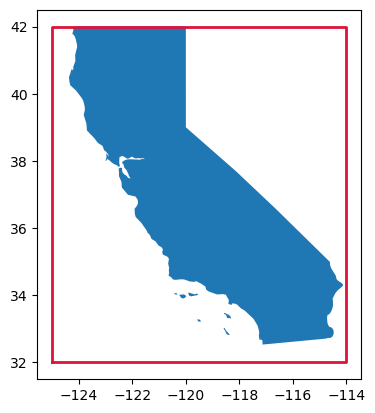

In [3]:
sf.plot()
plt.gca().plot([xn,xn,xx,xx,xn], [yn,yx,yx,yn,yn], color = "crimson", lw = 2)

# Active fire area

In [4]:
# load all fire data
df = pd.concat([pd.read_csv(fnm, parse_dates = ["acq_date"], index_col = "acq_date") for fnm in glob.glob("data/*M-C61*")])

# convert to geodataframe (standard lat-lon coords) & reproject geometry, add Lambert coordinates to gdf
df = gpd.GeoDataFrame(df, geometry = gpd.points_from_xy(x=df.longitude, y=df.latitude), crs = "EPSG:4326").clip(sf)

<AxesSubplot: >

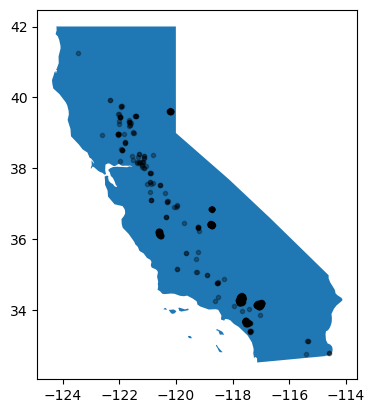

In [5]:
sf.plot()
df.loc["2024-09"].plot(ax = plt.gca(), color = "k", marker = ".", alpha = 0.3)

In [6]:
npx = df.resample("D").count()

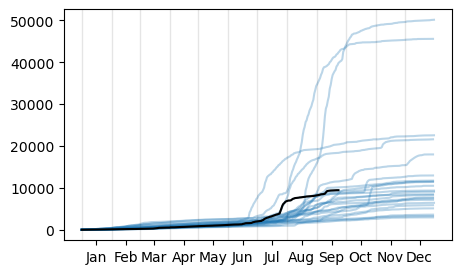

In [7]:
fig, ax = plt.subplots(ncols = 1, figsize = (5,3), dpi = 100)

# loop over each year & plot the annual time series
for y in range(2001,2025):
    ts_y = npx.loc[str(y), ["frp"]]
    ax.plot(ts_y.index.dayofyear, ts_y.cumsum(), color = "tab:blue", alpha = 0.3)

# add this year in a different colour
ts_y = npx.loc["2024", ["frp"]]
ax.plot(ts_y.index.dayofyear, ts_y.cumsum(), color = "k")

doy_axes()